<a href="https://colab.research.google.com/github/vikaskumar04121998/practical-for-deep-learning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.SimpleRNN(128))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 128)               24704     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 89,994
Trainable params: 89,994
Non-trainable params: 0
_________________________________________________________________


In [39]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]


In [40]:
batch_size = 64
input_dim = 28

units = 64
output_size = 10

def build_model(allow_cudnn_kernel=True):

    if allow_cudnn_kernel:
      layer = keras.layers.SimpleRNN(units, input_shape=(None, input_dim))
    else:
      layer = keras.layers.RNN(keras.layers.SimpleRNNCell(units), input_shape=(None, input_dim))
    model = keras.models.Sequential(
        [
            layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [41]:
model = build_model(allow_cudnn_kernel=True)
model.summary()
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 64)                5952      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 6,858
Trainable params: 6,730
Non-trainable params: 128
_________________________________________________________________


In [42]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=10)

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 1.0759 - accuracy: 0.6635 - val_loss: 0.5295 - val_accuracy: 0.8208
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.3610 - accuracy: 0.8929 - val_loss: 0.2907 - val_accuracy: 0.9102
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2707 - accuracy: 0.9197 - val_loss: 0.2489 - val_accuracy: 0.9267
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 0.2315 - accuracy: 0.9306 - val_loss: 0.2966 - val_accuracy: 0.9097
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2025 - accuracy: 0.9398 - val_loss: 0.1907 - val_accuracy: 0.9423
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1842 - accuracy: 0.9460 - val_loss: 0.1890 - val_accuracy: 0.9440
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1703 - accuracy: 0.9495 - val_loss: 0.1977 - val_accuracy: 0.9378
Epoch 

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.3031 - accuracy: 0.9118
Test Loss: 0.3031383156776428
Test Accuracy: 0.9118000268936157


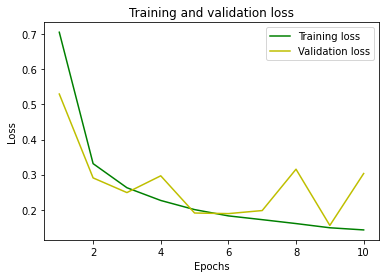

In [45]:
from matplotlib import pyplot as plt

plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

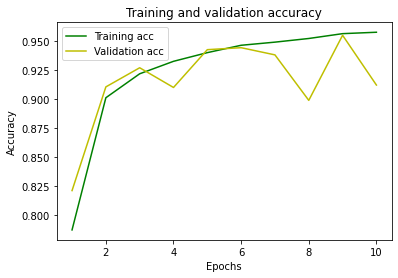

In [46]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()